# Part 3. Wine-Tasting Machine

1. Read  red-wine.csv into Python as a data frame, use a pandas profiling tool (https://github.com/pandas-profiling/pandas-profiling) to create an HTML file.

In [ ]:
pip install ydata-profiling

  Using cached ydata_profiling-4.6.1-py2.py3-none-any.whl (357 kB)


In [ ]:
pip install openpyxl

In [ ]:
import numpy as np
import pandas as pd
from ydata_profiling import ProfileReport

# Load the CSV file into a Pandas DataFrame
df = pd.read_csv('red_wine.csv')

# Create a profile report
profile = ProfileReport(df, title='Red Wine Dataset Profile Report', explorative=True)

# Generate the HTML report
profile.to_file('red-wine-profile.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

2. Fit a model using each of the following methods and report the performance metrics of 10-fold cross-validation using red-wine.csv as the training set

Note:


*   You are not required to tune the parameter for this homework assignment.
*   You can use the default parameter for each model.  
*   Baseline model accuracy is the accuracy when predicting the majority class; Baseline model AUC is the random classifier AUC





In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, accuracy_score

# Load the dataset
df = pd.read_csv('red_wine.csv')

# Define the features (X) and target (y)
X = df.drop('type', axis=1)  # Replace 'target_column' with the actual target column name
y = df['type']

# Initialize models
baseline_model = DummyClassifier(strategy='most_frequent')
logistic_regression_model = LogisticRegression()
naive_bayes_model = GaussianNB()
decision_tree_model = DecisionTreeClassifier()
svm_linear_model = SVC(kernel='linear')
svm_rbf_model = SVC(kernel='rbf')
random_forest_model = RandomForestClassifier()

# Create a list of models
models = [baseline_model, logistic_regression_model, naive_bayes_model,
          decision_tree_model, svm_linear_model, svm_rbf_model, random_forest_model]

# Dictionary to store performance metrics
performance_metrics = {
    'Model': [],
    'AUC': [],
    'Accuracy': []
}

# Perform 10-fold cross-validation for each model
for model in models:
    model_name = model.__class__.__name__  # Get the model name as a string
    auc_scores = cross_val_score(model, X, y, cv=10, scoring='roc_auc')
    accuracy_scores = cross_val_score(model, X, y, cv=10, scoring='accuracy')

    # Calculate mean AUC and Accuracy across 10 folds
    mean_auc = np.mean(auc_scores)
    mean_accuracy = np.mean(accuracy_scores)

    # Append results to the dictionary
    performance_metrics['Model'].append(model_name)
    performance_metrics['AUC'].append(mean_auc)
    performance_metrics['Accuracy'].append(mean_accuracy)

# Create a DataFrame to display the results
results_df = pd.DataFrame(performance_metrics)

# Display the results
print(results_df)

                    Model       AUC  Accuracy
0         DummyClassifier  0.500000  0.528887
1      LogisticRegression  0.879902  0.784785
2              GaussianNB  0.895408  0.821627
3  DecisionTreeClassifier  0.748499  0.760254
4                     SVC  0.881489  0.791863
5                     SVC  0.868920  0.535844
6  RandomForestClassifier  0.887573  0.800605


3. Plot the ROC curve of the Random Forest classifier from the Python package, and paste a screenshot of your ROC curve here

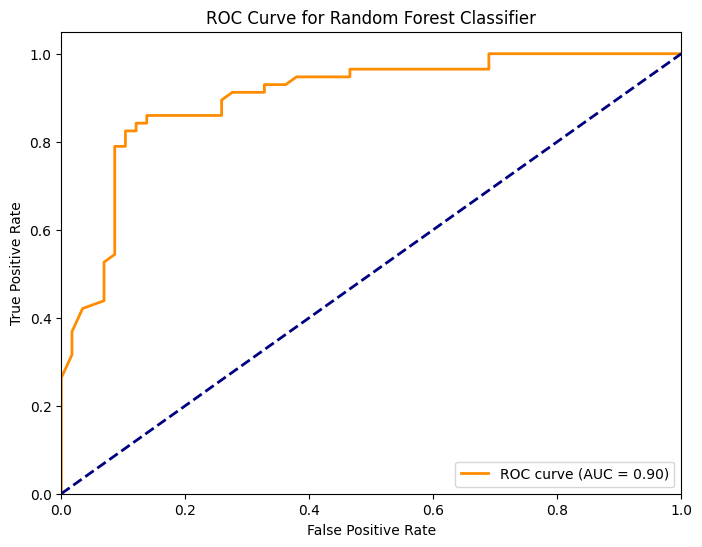

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('red_wine.csv')

# Define the features (X) and target (y)
X = df.drop('type', axis=1)  # Replace 'target_column' with the actual target column name
y = df['type']

# Convert 'type' column to binary labels (0 and 1)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the dataset into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the Random Forest classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

# Predict probabilities for the positive class (class 1)
y_prob = rf_classifier.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate the AUC (Area Under the ROC Curve)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest Classifier')
plt.legend(loc='lower right')
plt.show()

4. Using the best model obtained above in Q2 (according to AUC), running the model on white-wine.csv, and reporting the AUC score, comment on the performance.

In [ ]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score

# Load the 'white_wine.csv' dataset
df_white = pd.read_csv('white_wine.csv')  # Load the white wine dataset

# Separate features (X) and target (y)
X_white = df_white.drop('type', axis=1)  # Replace 'target_column' with the actual target column name
y_white = df_white['type']  # Replace 'target_column' with the actual target column name

# Create a Naive Bayes model
naive_bayes_model = GaussianNB()

# Calculate AUC using cross-validation on the white wine dataset
auc_white = cross_val_score(naive_bayes_model, X_white, y_white, cv=10, scoring='roc_auc')

# Report the AUC score
print("Naive Bayes AUC on white_wine.csv:", auc_white.mean())

Naive Bayes AUC on white_wine.csv: 0.95
